In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

#Frequency Analysis

Read and preprocess the file `oct_delta.csv`

In [ ]:
import pandas as pd
import re
import nltk

from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer, SnowballStemmer

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

import gensim
from gensim.corpora import Dictionary
from gensim.models import LdaModel,CoherenceModel,TfidfModel,Nmf,LsiModel

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/RDGopal/IB9CW0-Text-Analytics/main/Data/oct_delta.csv')

# drop data with missing values in the 'text' column
df = df.dropna(axis=0, subset=['text'])
df['text'].head()

In [ ]:
# Put it all into a function
def preprocess_text(text):
    # Lowercase
    text = text.lower()
    # Tokenize
    tokens = nltk.word_tokenize(text)
    # Remove stopwords
    stop_words = stopwords.words('english')
    extra_words = ['.','*',',']
    stop_words.extend(extra_words)
    tokens = [token for token in tokens if token not in stop_words and token.isalpha()]
    # Lemmatize
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(token) for token in tokens]
    return ' '.join(tokens)

In [ ]:
df['text'] = df['text'].apply(preprocess_text)
df

Conduct frequency analysis with `oct_delta.csv` file.

In [ ]:
# Tokenize
df['tokens'] = df['text'].apply(nltk.word_tokenize)

In [ ]:
# create list of tokens
documents = df['tokens'].tolist()

# create the dictionary
dictionary = Dictionary(documents) # list of lists (documents)

# filter extremes from the dictionary (optional, but recommended)
dictionary.filter_extremes(no_below=5, no_above=0.5) # at least appears in 5 documents, no more than 50%

# create bag-of-words representation
corpus = [dictionary.doc2bow(document) for document in documents]

# create tf-idf representation
tfidf_model = TfidfModel(corpus)
tfidf_corpus = [tfidf_model[doc] for doc in corpus]

In [ ]:
!pip install matplotlib wordcloud

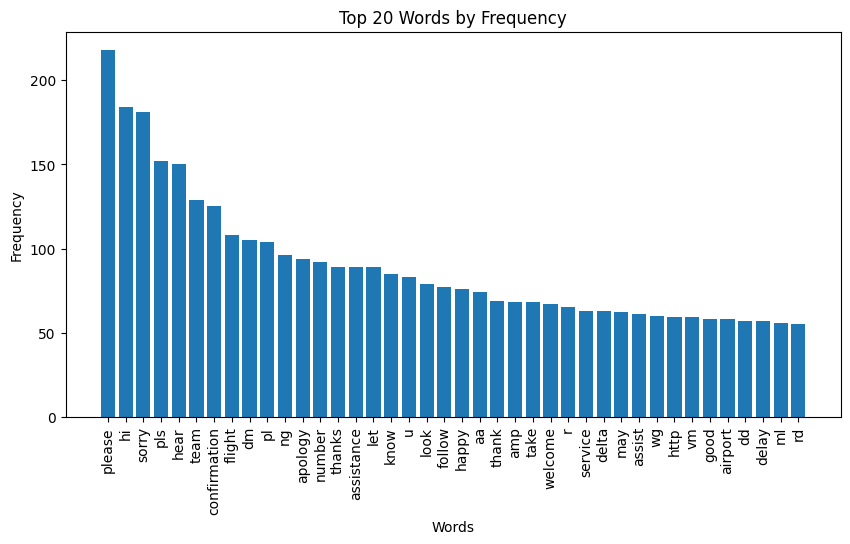

In [ ]:
from collections import Counter
import matplotlib.pyplot as plt

# Summing up the counts from the BoW corpus
total_word_count = Counter(word_id for document in corpus for word_id, count in document)

# Mapping back the word IDs to words
mapped_word_counts = [(dictionary[word_id], count) for word_id, count in total_word_count.items()]

# Sort words by frequency
sorted_word_counts = sorted(mapped_word_counts, key=lambda w: w[1], reverse=True)

# Let's plot the top words
plt.figure(figsize=(10, 5))
words, counts = zip(*sorted_word_counts[:40])
plt.bar(words, counts)
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 20 Words by Frequency')
plt.xticks(rotation=90)
plt.show()

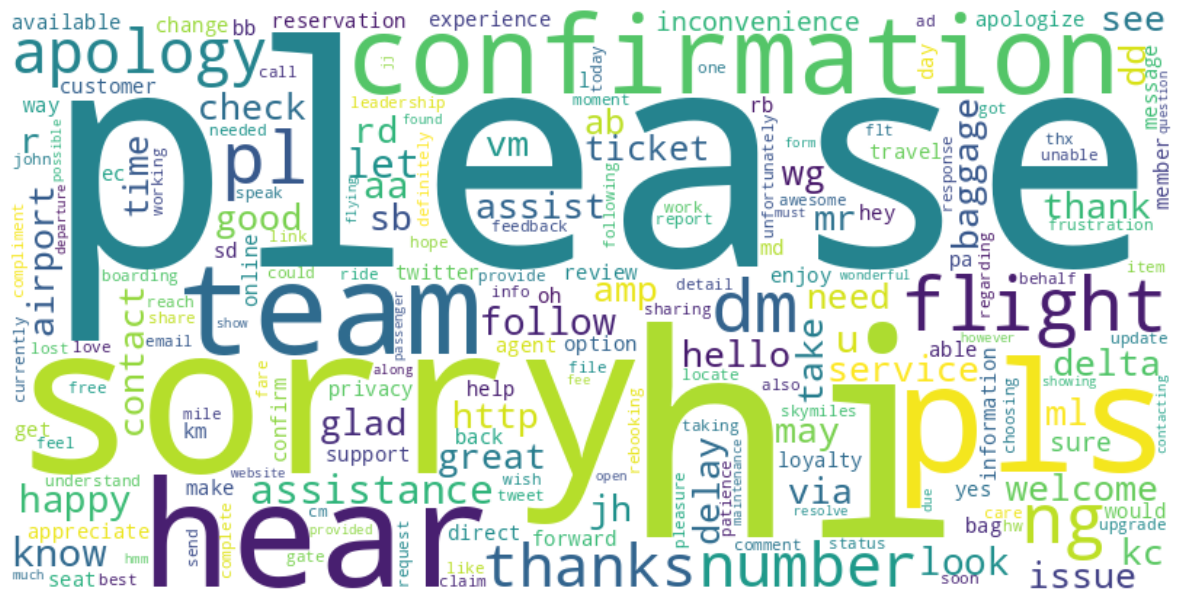

In [ ]:
from wordcloud import WordCloud

# Creating a dictionary for word cloud
word_freq_dict = dict(sorted_word_counts)

# Creating word cloud
wordcloud = WordCloud(width = 800, height = 400, background_color ='white').generate_from_frequencies(word_freq_dict)

# Displaying the word cloud
plt.figure(figsize=(15, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Turn off axis numbers and ticks
plt.show()


#Zipf's law analysis

In [ ]:
import requests
from nltk.tokenize import word_tokenize

# URL to the raw text file on GitHub
url ="https://datasets-server.huggingface.co/rows?dataset=JiggaBooJombs%2FNovelist&config=default&split=train&offset=0&length=100"

# Use requests to get the content of the file
response = requests.get(url)

# Ensure the request was successful
if response.status_code == 200:
    text = response.text.lower()
    # Continue processing the text as needed
else:
    print("Failed to retrieve the file. Status code:", response.status_code)

# Tokenize the text
tokens = word_tokenize(text)

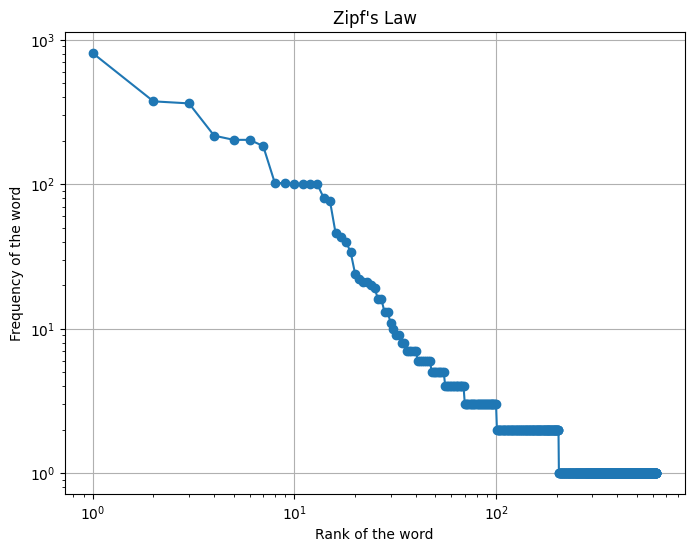

In [ ]:
import nltk
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt
from collections import Counter
import numpy as np

# Count frequencies
word_counts = Counter(tokens)

# Sort words by frequency
sorted_word_counts = word_counts.most_common()

# Prepare data for plotting
ranks = range(1, len(sorted_word_counts) + 1)
frequencies = [freq for _, freq in sorted_word_counts]

# Log-log plot
plt.figure(figsize=(8, 6))
plt.loglog(ranks, frequencies, marker="o")
plt.title('Zipf\'s Law')
plt.xlabel('Rank of the word')
plt.ylabel('Frequency of the word')
plt.grid(True)
plt.show()

#POS analysis

In [ ]:
# Download necessary NLTK resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/RDGopal/IB9CW0-Text-Analytics/main/Data/oct_delta.csv')

# drop data with missing values in the 'text' column
df = df.dropna(axis=0, subset=['text'])

In [ ]:
df['text'] = df['text'].apply(preprocess_text)

In [ ]:
# Tokenize
df['tokens'] = df['text'].apply(word_tokenize)

# POS tagging the tokens for each document and create a flat list for all tokens
pos_tags = [tag for sublist in df['tokens'] for tag in nltk.pos_tag(sublist)]

# Count word frequencies (including the POS tags for uniqueness)
word_counts = Counter(pos_tags)

# Create a list of dictionaries to later convert to a DataFrame
data = [{'Word': word, 'POS': pos, 'WordCount': count} for (word, pos), count in word_counts.items()]

# Create the DataFrame
df_pos = pd.DataFrame(data)

df_pos